In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from collections import defaultdict

In [2]:
ratings = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"ratings/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"ratings/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata
                combined = {**{"Model": model, "Category": category}, **dict([score[2:].split(":") for score in text.split("\n")[4:]])}
                combined = {k: float(v) if k not in ["Model", "Category"] else v for k, v in combined.items() }
                ratings.append(combined)
                
df = pd.DataFrame(ratings)

In [3]:
df.drop("Category", axis=1).groupby("Model").agg(["mean", "std"])

Feature attention           Temporal attention            \
                      mean       std               mean       std   
Model                                                               
CNN                    5.2  1.788854                4.6  2.701851   
CNN-LSTM               6.6  2.509980                5.4  1.673320   
LSTM                   6.4  2.302173                5.4  2.302173   

         Spatiotemporal attention           General            
                             mean       std    mean       std  
Model                                                          
CNN                           5.4  2.073644     6.4  1.140175  
CNN-LSTM                      6.4  2.408319     6.8  1.095445  
LSTM                          5.4  1.140175     6.0  0.707107

In [4]:
sliders = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"sliders/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"sliders/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata                               
                combined = {**{"Model": model, "Category": category}, **eval(text.split("\n")[-1][8:])}
                combined = {k: float(v) if k not in ["Model", "Category"] else v for k, v in combined.items() }
                sliders.append(combined)

df1 = pd.DataFrame(sliders) #.iloc[:, 2:].sum(axis=1)

In [5]:
df1.iloc[:, 2:] = df1.iloc[:, 2:].divide(df1.iloc[:, 2:].sum(axis=1), axis=0) * 100
df1

,Model,Category,isco code,function id,company,education,days worked,isco level,CV,skills,certificates,languages,licenses,location
0,LSTM,customer_support,11.405703,16.258129,9.704852,11.805903,4.652326,1.250625,7.803902,17.858929,7.953977,6.053027,2.101051,3.151576
1,CNN,customer_support,0.000000,0.000000,23.716012,0.000000,23.967774,14.551863,0.000000,0.000000,0.000000,18.429003,0.000000,19.335347
2,CNN-LSTM,customer_support,5.002501,4.902451,3.201601,21.260630,22.211106,13.956978,0.000000,0.000000,0.000000,20.260130,0.000000,9.204602
3,LSTM,customer_support,12.406203,9.754877,7.703852,14.407204,14.407204,0.000000,15.257629,0.000000,0.000000,16.108054,0.000000,9.954977
4,CNN,customer_support,8.872180,7.468672,3.759398,11.478697,8.320802,1.253133,18.245614,24.060150,12.781955,1.253133,1.253133,1.253133
5,CNN-LSTM,customer_support,9.466264,14.702920,2.567976,14.300101,6.696878,1.258812,17.321249,26.737160,1.258812,1.258812,1.258812,3.172205
6,CNN-LSTM,finance,1.200600,1.200600,5.002501,12.756378,5.002501,21.510755,16.858429,21.510755,1.250625,10.105053,0.000000,3.601801
7,LSTM,finance,1.250000,10.600000,7.200000,5.850000,10.450000,11.000000,12.850000,13.400000,12.350000,1.100000,7.850000,6.100000
8,CNN,finance,1.258178,23.804731,23.754404,15.551082,1.258178,19.073981,9.008556,1.258178,1.258178,1.258178,1.258178,1.258178
9,CNN,finance,1.250625,3.201601,2.451226,15.607804,6.403202,20.760380,16.108054,22.461231,1.250625,4.352176,0.850425,5.302651


In [6]:
model_ratings = df1.drop("Category", axis=1).groupby("Model").mean()

In [7]:
model_ratings.index = ["CNN", "CNN_LSTM", "LSTM"]

In [9]:
# CNN-LSTM
CNN_LSTM_finance = {"company" : 19.8, "isco level": 18.3, "function id": 15.7, 
                    "isco code": 13.1, "CV": 10.8, "skills":8, "education":6.7, 
                    "languages":5.8, "certificates":1.2, "licenses":0.9, 
                    "location": 0, "days worked": 0}

CNN_LSTM_health = {"company" : 18.4, "isco level": 5.7, "function id": 16.6, 
                   "isco code": 12.0, "CV": 9.1, "skills":5.1, "education":11.8, 
                   "languages":8.8, "certificates":6.8, "licenses":0, 
                   "location": 0.8, "days worked": 4.8}

CNN_LSTM_cust_sup = {"company" : 21.8, "isco level": 6.9, "function id": 20.5, 
                     "isco code": 17.1, "CV": 15.1, "skills":5.8, "education":6.2, 
                     "languages":3.1, "certificates":2.3, "licenses":0, 
                     "location": 0.8, "days worked": 0}

# CNN_LSTM_finance = (pd.read_csv("values_5270318").set_index("Unnamed: 0") * 100).sort_index()
# CNN_LSTM_finance.index = ["days worked", "certificates", "company", "CV", "education", "function id", 
#                           "isco code", "isco level", "languages", "licenses", "location", "skills"]

# CNN_LSTM_finance = CNN_LSTM_finance.to_dict()["0"]

# CNN_LSTM_health = (pd.read_csv("values_7112518").set_index("Unnamed: 0") * 100).sort_index().to_dict()["0"]
# CNN_LSTM_health.index = ["days worked", "certificates", "company", "CV", "education", "function id", 
#                          "isco code", "isco level", "languages", "licenses", "location", "skills"]

# CNN_LSTM_finance = CNN_LSTM_finance.to_dict()["0"]

# CNN_LSTM_cust_sup = (pd.read_csv("values_8093077").set_index("Unnamed: 0") * 100).sort_index().to_dict()["0"]
# CNN_LSTM_cust_sup.index = ["days worked", "certificates", "company", "CV", "education", "function id", 
#                            "isco code", "isco level", "languages", "licenses", "location", "skills"]


# CNN
CNN_finance = {"company" : 12.4, "isco level": 6.3, "function id": 11.7, 
               "isco code": 8.6, "CV": 6.9, "skills": 6.9, "education":10.0, 
               "languages": 6.9, "certificates": 6.9, "licenses": 6.9, 
               "location": 8.2, "days worked": 7.2}

CNN_health = {"company" : 17.3, "isco level": 4.7, "function id": 24.6, 
              "isco code": 30.9, "CV": 0, "skills": 0, "education": 22.3, 
              "languages": 0, "certificates": 0.2, "licenses": 0, 
              "location": 0.8, "days worked": 0}

CNN_cust_sup = {"company" : 10.5, "isco level": 7.7, "function id": 11.4, 
                "isco code": 9.8, "CV": 7.2, "skills": 7.2, "education": 8.8, 
                "languages":7.5, "certificates":7.4, "licenses": 7.8, 
                "location": 7.9, "days worked": 6.9}

# LSTM
LSTM_finance = {"company" : 8.4, "isco level": 12.0, "function id": 8.5, 
                "isco code": 9.2, "CV": 6.3, "skills": 6.2, "education":8.9, 
                "languages": 8.7, "certificates": 6.1, "licenses": 8.3, 
                "location": 7.1, "days worked": 8.6}

LSTM_health = {"company" : 8.9, "isco level": 15.7, "function id": 9.2, 
               "isco code": 10.5, "CV": 6.35, "skills": 6.35, "education": 8.0, 
               "languages": 6.4, "certificates": 6.35, "licenses": 6.35, 
               "location": 6.35, "days worked": 8.5}

LSTM_cust_sup = {"company" : 9.8, "isco level": 9.9, "function id": 8.9, 
                 "isco code": 9.7, "CV": 6.9, "skills": 7.0, "education": 9.7, 
                 "languages": 7.3, "certificates": 6.8, "licenses": 8.3, 
                 "location": 7.5, "days worked": 7.6}

In [10]:
CNN_LSTM_cust_sup

{'company': 21.8,
 'isco level': 6.9,
 'function id': 20.5,
 'isco code': 17.1,
 'CV': 15.1,
 'skills': 5.8,
 'education': 6.2,
 'languages': 3.1,
 'certificates': 2.3,
 'licenses': 0,
 'location': 0.8,
 'days worked': 0}

In [11]:
import warnings
warnings.filterwarnings("ignore")

CNN_LSTM
- Pearson's r: 0.19147687144555559
- RMSE: 7.2662070926021975
CNN
- Pearson's r: 0.16974904586095022
- RMSE: 5.427359319145663
LSTM
- Pearson's r: 0.2307863928479909
- RMSE: 3.686081357483497


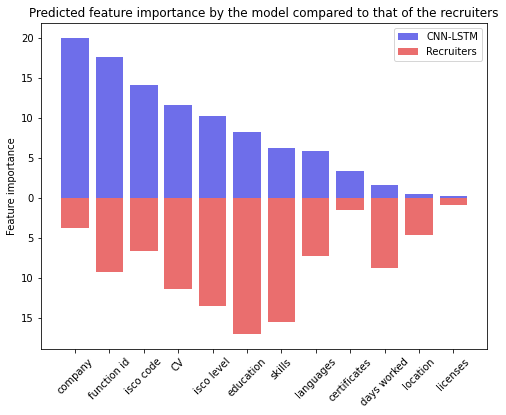

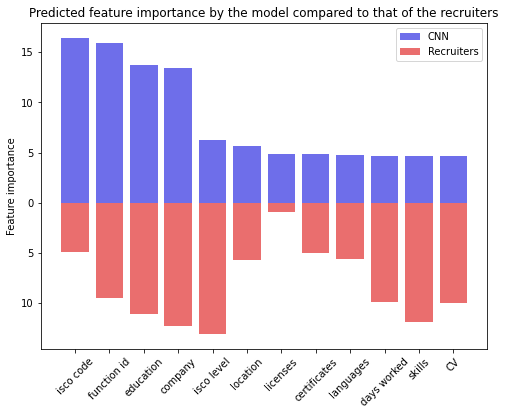

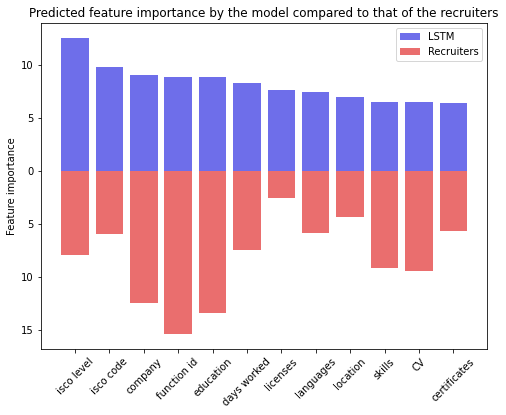

In [12]:
for model in ["CNN_LSTM", "CNN", "LSTM"]:    
    df = pd.DataFrame([eval(f"{model}_finance"), 
                       eval(f"{model}_health"), 
                       eval(f"{model}_cust_sup")]).mean(axis=0).sort_values(ascending=False)
    
    df2 = model_ratings.loc[model]
    
    combined = pd.concat([df.rename(model), (df2 * -1).rename("Recruiters")], axis=1)
    
    print(model)
    print("- Pearson's r:", combined.abs().corr().loc[model, "Recruiters"])
    print("- RMSE:", np.sqrt(np.sum((combined.abs()["Recruiters"] - combined.abs()[model])**2) / len(combined)))
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.barplot(y=combined[model].values, x=combined.index, color='b', alpha=0.65, label=model.replace("_", "-"), ax=ax)
    sns.barplot(y=combined["Recruiters"].values, x=combined.index, color='r', alpha=0.65, label='Recruiters', ax=ax)

    plt.legend()
    plt.xticks(rotation=45);

    ticks =  ax.get_yticks()
    
    # set labels to absolute values and with integer representation
    plt.ylabel("Feature importance")
    plt.title("Predicted feature importance by the model compared to that of the recruiters")
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])
    
    plt.plot()
    plt.savefig(f"Visualisations/{model}.pdf", bbox_inches='tight');